In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPClassifier

In [6]:
# Liest die CSV-Datei "messages2.csv" und speichert sie in einem DataFrame
df = pd.read_csv("messages2.csv")

# Nimmt alle Spalten außer der ersten und der letzten (Mssg. No. & Prediction) aus dem DataFrame und speichert ihre Werte in X
X = df[df.columns[1:-1]].values

# Nimmt die letzte Spalte aus dem DataFrame und speichert ihre Werte in y
y = df[df.columns[-1]].values

# Teilt die Daten in Trainings- und Testsets auf, wobei 20% der Daten für das Testset reserviert sind
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True)

In [7]:
# Initialisiert ein Wörterbuch namens 'score_data' mit fünf Schlüsseln: 'algorithms', 'train_scores', 'test_scores', 'cross_val_means' und 'cross_val_stds'.
# Jeder Schlüssel ist mit einer leeren Liste verknüpft.
# 'algorithms' wird verwendet, um die Namen der Algorithmen zu speichern.
# 'train_scores' wird verwendet, um die Trainings-Scores der Algorithmen zu speichern.
# 'test_scores' wird verwendet, um die Test-Scores der Algorithmen zu speichern.
# 'cross_val_means' wird verwendet, um die Durchschnittswerte der Kreuzvalidierungsscores der Algorithmen zu speichern.
# 'cross_val_stds' wird verwendet, um die Standardabweichungen der Kreuzvalidierungsscores der Algorithmen zu speichern.
score_data = {'algorithms': [],
              'train_scores': [],
              'test_scores': [],
              'cross_val_means': [],
              'cross_val_stds': []}

# Definiert eine Funktion namens 'getScores', die einen Algorithmusnamen als Eingabe nimmt
def getScores(name):
    # Gibt den Namen des Algorithmus aus
    print(name)
    # Fügt den Namen des Algorithmus zur Liste 'algorithms' im Wörterbuch 'score_data' hinzu
    score_data['algorithms'].append(name)

    # Trainiert das Modell mit den Trainingsdaten und berechnet den R2-Score
    train_score = r2_score(y_train, model.fit(
        X_train, y_train).predict(X_train))
    # Fügt den R2-Score zur Liste 'train_scores' im Wörterbuch 'score_data' hinzu
    score_data['train_scores'].append(train_score)
    # Gibt den R2-Score für das Training aus
    print('Train R2: {}'.format(train_score))

    # Trainiert das Modell mit den Trainingsdaten und berechnet den R2-Score für die Testdaten
    test_score = r2_score(y_test, model.fit(X_train, y_train).predict(X_test))
    # Fügt den R2-Score zur Liste 'test_scores' im Wörterbuch 'score_data' hinzu
    score_data['test_scores'].append(test_score)
    # Gibt den R2-Score für den Test aus
    print('Test R2: {}'.format(test_score))

    # Führt eine 5-fache Kreuzvalidierung durch und berechnet die R2-Scores
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    # Gibt die R2-Scores der Kreuzvalidierung aus
    print('Scores: {}'.format(scores))
    # Gibt den Durchschnitt der R2-Scores der Kreuzvalidierung aus
    print('Mean score: {}'.format(scores.mean()))
    # Gibt die Standardabweichung der R2-Scores der Kreuzvalidierung aus
    print('Std score: {}'.format(scores.std()))

    # Fügt den Durchschnitt der R2-Scores zur Liste 'cross_val_means' im Wörterbuch 'score_data' hinzu
    score_data['cross_val_means'].append(scores.mean())
    # Fügt die Standardabweichung der R2-Scores zur Liste 'cross_val_stds' im Wörterbuch 'score_data' hinzu
    score_data['cross_val_stds'].append(scores.std())

    # Gibt eine leere Zeile aus, um die Ausgabe übersichtlicher zu gestalten
    print()

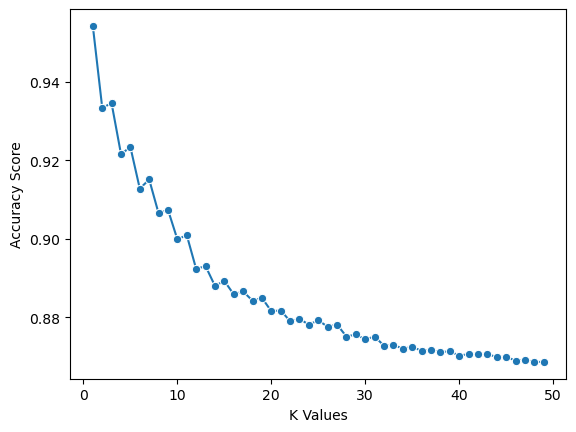

In [8]:
k_values = [i for i in range(1, 50)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

sns.lineplot(x=k_values, y=scores, marker='o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.show()

In [9]:
# Initialisiert das KNeighborsClassifier-Modell mit 2 Nachbarn (bestes Ergebnis)
model = KNeighborsClassifier(n_neighbors=2)
# Ruft die Funktion 'getScores' auf, um das Modell zu trainieren und die R2-Scores zu berechnen
getScores('kNN')

kNN
Train R2: 0.6253131930655956
Test R2: 0.4577375741659373
Scores: [0.37413644 0.40302245 0.32587549 0.36958462 0.36958462]
Mean score: 0.3684407247707857
Std score: 0.024668820837705593



In [10]:
# Initialisiert das LogisticRegression-Modell mit maximal 1000 Iterationen
# Iterationen in der logistischen Regression sind Schritte in einem Optimierungsverfahren (normalerweise Gradientenabstieg),
# das versucht, die bestmöglichen Parameter für das Modell zu finden, indem es den Fehler zwischen den vorhergesagten und den tatsächlichen Werten minimiert.
model = LogisticRegression(max_iter=1000)
getScores('Log Regression')

Log Regression
Train R2: 0.9497842423696159
Test R2: 0.8450678783331249
Scores: [0.83631261 0.81705527 0.7881323  0.81572474 0.80602604]
Mean score: 0.8126501888431024
Std score: 0.01570843149832964



In [11]:
# Initialisiert das RandomForestClassifier-Modell.
# Dies ist ein Klassifikationsalgorithmus, der eine Gruppe von Entscheidungsbäumen erstellt
# und die am häufigsten vorkommende Klasse (oder den Durchschnitt im Fall einer Regression) als Vorhersage verwendet.
model = RandomForestClassifier()
getScores('Random Forest Classifier')

Random Forest Classifier
Train R2: 0.9980686247065237
Test R2: 0.7908416357497187
Scores: [0.82668394 0.77854059 0.71108949 0.66054557 0.72843645]
Mean score: 0.7410592073768278
Std score: 0.05705508303909082



In [12]:
# Initialisiert das SupportVectorMachine-Modell mit einem linearen Kernel
# Ein linearer Kernel in einer Support Vector Machine (SVM) bedeutet, dass die Trennung zwischen den Klassen durch eine gerade Linie (in 2D) oder eine Hyperebene (in höheren Dimensionen) erfolgt.
# Dies ist die einfachste Art von Kernel und eignet sich gut für Daten, die linear trennbar sind.
model = svm.SVC(kernel='linear')
getScores('SVM')

SVM
Train R2: 0.9922744988260948
Test R2: 0.8373212722497811
Scores: [0.86519862 0.82668394 0.79776265 0.83512213 0.78662864]
Mean score: 0.8222791949787313
Std score: 0.02792290405294452



In [13]:
# Erstellen eines Modells mit dem MLPClassifier (Multi-Layer Perceptron Classifier). Dies ist ein neuronales Netzwerk, das aus mehreren Schichten von Neuronen besteht.
# Die Parameter bedeuten:
# - random_state=42: Dies stellt sicher, dass die Zufälligkeit des Modells bei jedem Lauf gleich ist, so dass die Ergebnisse reproduzierbar sind.
# - max_iter=10000: Dies ist die maximale Anzahl von Iterationen (oder Durchläufen durch das Netzwerk), die das Modell durchführen wird, um die besten Parameter zu finden.
# - hidden_layer_sizes=[100, 100]: Dies bedeutet, dass das Netzwerk zwei versteckte Schichten hat, jede mit 100 Neuronen.
model = MLPClassifier(random_state=42, max_iter=10000,
                      hidden_layer_sizes=[100, 100])
getScores('NEURAL NETWORK')

NEURAL NETWORK
Train R2: 0.9980686247065237
Test R2: 0.8838009087498437
Scores: [0.89408463 0.85556995 0.7881323  0.80602604 0.77692994]
Mean score: 0.8241485705792165
Std score: 0.04412154179360637



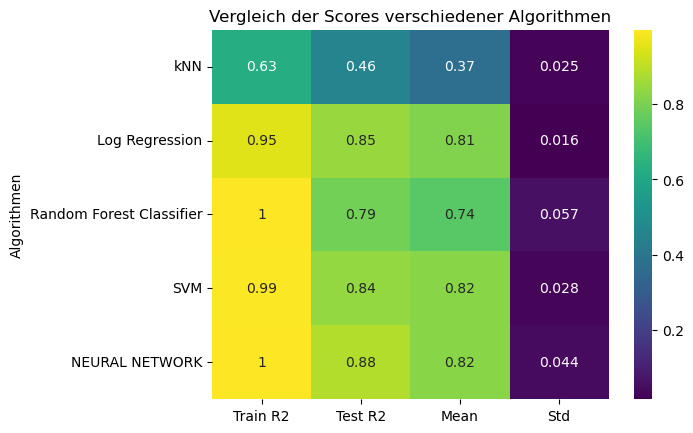

In [14]:
# Erstellen eines DataFrame mit den Daten aus score_data. Die Daten werden in Spalten organisiert, die 'Algorithmen', 'Train R2', 'Test R2', 'Mean' und 'Std' genannt werden.
data = pd.DataFrame(list(zip(score_data['algorithms'], score_data['train_scores'], score_data['test_scores'], score_data['cross_val_means'],
                    score_data['cross_val_stds'])), columns=['Algorithmen', 'Train R2', 'Test R2', 'Mean', 'Std'])

# Setzen der 'Algorithmen'-Spalte als Index des DataFrame. Dies bedeutet, dass die Algorithmen-Namen jetzt die Zeilenetiketten des DataFrame sind.
data.set_index('Algorithmen', inplace=True)

# Erstellen einer Heatmap mit den Daten im DataFrame. Die Zahlen in der Heatmap werden durch die Option annot=True angezeigt. Die Farbskala der Heatmap wird durch cmap='viridis' festgelegt.
sns.heatmap(data, annot=True, cmap='viridis')
# Hinzufügen eines Titels zur Heatmap.
plt.title('Vergleich der Scores verschiedener Algorithmen')
# Anzeigen der Heatmap und des Titels.
plt.show()